In [62]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import csv
import numpy as np
from statistics import mean
import math as m

# Calculating the mean resting value for flexion and extension with no FB vs with FB, TTA users
The definition of resting value is data that is below the normalised value of 20

In [63]:
def normalise(signal1, signal2, MVC_M1_SCALED, MVC_M2_SCALED):
    ''' 
    A function that normalises the raw EMG signals for muscle 1 and 2
    outputs the normalised muscle contraction values for m1 and m2
    '''
    s1_normal = int(signal1/MVC_M1_SCALED *100)
    s2_normal = int(signal2/MVC_M2_SCALED *100)
    return s1_normal, s2_normal

def find_rest_data(emg1, emg2):
    ''' 
    A function that finds the data that is below the normalised value of 20
    '''
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg1[i] < 20 or emg2[i] < 20:
            flex_x.append(emg1[i])
            flex_y.append(emg2[i])
    return flex_x, flex_y



def find_flex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during flexion
    '''
    flex_x = []
    flex_y = []
    for i in range(len(emg1)):
        if emg2[i] > emg1[i]:
            if emg2[i] <= 20 :
                flex_x.append(emg1[i])
                flex_y.append(emg2[i])
    return flex_x, flex_y


def find_ex_data(emg1, emg2):
    ''' 
    A function that finds the EMG data during extension
    '''
    ex_x = []
    ex_y = []
    for i in range(len(emg2)):
        if emg1[i] > emg2[i]:
            if emg1[i] <= 20 :
                ex_x.append(emg1[i])
                ex_y.append(emg2[i])
    return ex_x, ex_y

# TTA: 1, age: 35

In [64]:
# MVC,142,MVC,195

MVC_M1 = 142
MVC_M2 = 195
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8


with open('EMG_Users\Markus_raw_nofeedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw = []
        emg2_raw = []
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw.append(emg1)
                emg2_raw.append(emg2)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Markus_raw_feedback_cleaned.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_raw_feed = []
        emg2_raw_feed = []
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_raw_feed.append(emg1_feed)
                emg2_raw_feed.append(emg2_feed)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

slope flex: 3.1318247550070426, y axis flex: 0
slope ex: 0.2914944835213775, y axis ex: 0
mean values for flex x and y: 0.8717627401837929, 4.154553049289891
Magnitude of flex: 4.2450301900618665
mean values for ex x and y: 4.373020585906572, 1.1856690419635787
Magnitude of flex: 4.530907207373981


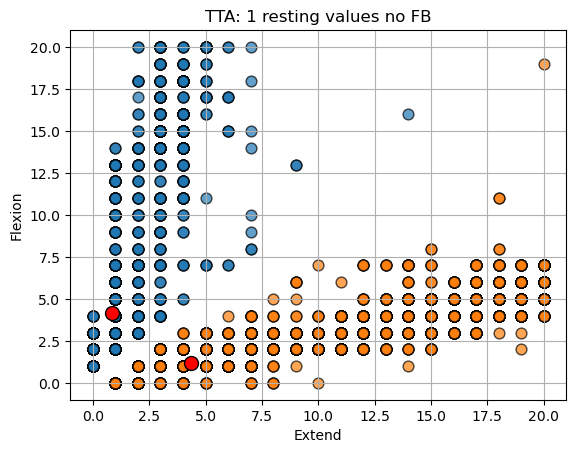

In [65]:
# find resting data. emg signal below 20
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)


# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)

# change lists to numpy array for the polyfit
# NO FB
sub1_flex_x = np.array(flex_x)
sub1_flex_y = np.array(flex_y)
sub1_ex_x = np.array(ex_x)
sub1_ex_y = np.array(ex_y)

#find line of best fit
# NO FB
sub1_a, sub1_b = np.polyfit(sub1_flex_x, sub1_flex_y, 1)
sub1_b = 0
print(f"slope flex: {sub1_a}, y axis flex: {sub1_b}")
sub1_c, sub1_d = np.polyfit(sub1_ex_x, sub1_ex_y, 1)
sub1_d = 0
print(f"slope ex: {sub1_c}, y axis ex: {sub1_d}")


#add points to plot
plt.scatter(sub1_flex_x, sub1_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x,   sub1_ex_y,   s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)
print(f"mean values for flex x and y: {mean_flex_x}, {mean_flex_y}")
TTA1_mag_flex = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
print(f"Magnitude of flex: {TTA1_mag_flex}")


print(f"mean values for ex x and y: {mean_ex_x}, {mean_ex_y}")
TTA1_mag_ex = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
print(f"Magnitude of flex: {TTA1_mag_ex}")


#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex = np.linspace(0, 48, num=100)
# plt.plot(sub1_xseq_flex, sub1_a*sub1_xseq_flex+sub1_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex = np.linspace(0, max(sub1_ex_x), num=100)
# plt.plot(sub1_xseq_ex, sub1_c*sub1_xseq_ex+sub1_d, color='y')

plt.title('TTA: 1 resting values no FB')
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

with FB

feedback, slope flex: 2.4569626762850785, feedback, y axis flex: 0
feedback, slope ex: 0.27157801127578735, feedback, y axis flex: 0
mean values for flex x and y: 0.6515297906602254, 2.9130434782608696
Magnitude of flex with FB: 2.985014803037992
mean values for ex x and y: 4.484415745684838, 1.1445424065565628
Magnitude of flex: 4.628170470126656


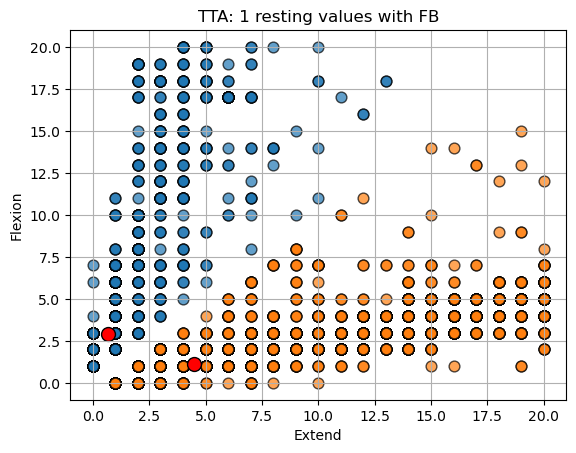

In [66]:
# find resting data. emg signal below 20
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)

# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)

# calculate Average resting values for flexion and extension with FB
mean_flex_x_feed = mean(flex_x_feed)
mean_flex_y_feed = mean(flex_y_feed)
mean_ex_x_feed = mean(ex_x_feed)
mean_ex_y_feed = mean(ex_y_feed)
      

# WITH FB, create numpy arrays
sub1_flex_x_feed = np.array(flex_x_feed)
sub1_flex_y_feed = np.array(flex_y_feed)
sub1_ex_x_feed = np.array(ex_x_feed)
sub1_ex_y_feed = np.array(ex_y_feed)


# find line of best fit
# WITH FB
sub1_a_feed, sub1_b_feed = np.polyfit(sub1_flex_x_feed, sub1_flex_y_feed, 1)
sub1_b_feed = 0
print(f"feedback, slope flex: {sub1_a_feed}, feedback, y axis flex: {sub1_b_feed}")
sub1_c_feed, sub1_d_feed = np.polyfit(sub1_ex_x_feed, sub1_ex_y_feed, 1)
sub1_d_feed = 0
print(f"feedback, slope ex: {sub1_c_feed}, feedback, y axis flex: {sub1_d_feed}")

plt.scatter(sub1_flex_x_feed, sub1_flex_y_feed, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub1_ex_x_feed, sub1_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x_feed, mean_flex_y_feed, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x_feed, mean_ex_y_feed, color="r", alpha=1, edgecolors="k", s=100)

print(f"mean values for flex x and y: {mean_flex_x_feed}, {mean_flex_y_feed}")
TTA1_mag_flex_feed = m.sqrt(mean_flex_x_feed**2 + mean_flex_y_feed**2)
print(f"Magnitude of flex with FB: {TTA1_mag_flex_feed}")

print(f"mean values for ex x and y: {mean_ex_x_feed}, {mean_ex_y_feed}")
TTA1_mag_ex_feed = m.sqrt(mean_ex_x_feed**2 + mean_ex_y_feed**2)
print(f"Magnitude of flex: {TTA1_mag_ex_feed}")


# Create sequence of 100 numbers from 0 to max value
sub1_xseq_flex_feed = np.linspace(0, 43, num=100)
# plt.plot(sub1_xseq_flex_feed, sub1_a_feed*sub1_xseq_flex_feed+sub1_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub1_xseq_ex_feed = np.linspace(0, max(sub1_ex_x_feed), num=100)
# plt.plot(sub1_xseq_ex_feed, sub1_c_feed*sub1_xseq_ex_feed+sub1_d_feed, color='y')

plt.title('TTA: 1 resting values with FB')
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

# TTA user 2, age: 57

In [67]:
# MVC,231,MVC,231

MVC_M1 = 231
MVC_M2 = 231
 
MVC_M1_SCALED = MVC_M1*0.8
MVC_M2_SCALED = MVC_M2*0.8

# ATHUGA HERNA
with open('EMG_Users\Gummi_raw_nofeedback.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_norm = []
        emg2_norm = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1, emg2 = map(int, row)
                M1_norm, M2_norm = normalise(emg1, emg2, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_norm.append(M1_norm)
                emg2_norm.append(M2_norm)


with open('EMG_Users\Gummi_raw_feedback_minus2rst.csv') as file:
        csv_reader = csv.reader(file, delimiter=',')

        line_count = 0
        emg1_norm_feed = []
        emg2_norm_feed = []
        for row in csv_reader:
            line_count += 1
            if line_count > 2:
                emg1_feed, emg2_feed = map(int, row)
                M1_norm_feed, M2_norm_feed = normalise(emg1_feed, emg2_feed, MVC_M1_SCALED, MVC_M1_SCALED)
                emg1_norm_feed.append(M1_norm_feed)
                emg2_norm_feed.append(M2_norm_feed)

No feedback

mean values for flex x and y: 5.549228944246738, 13.500593119810201
Magnitude of flex: 14.596573449352157
mean values for ex x and y: 4.421284731859253, 1.0738890430813828
Magnitude of flex: 4.5498347615074985


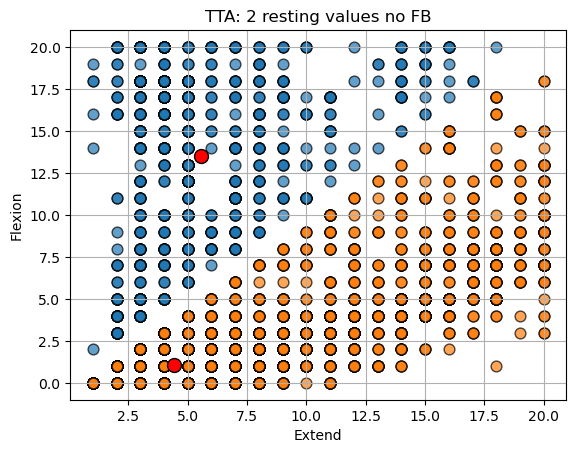

In [68]:
# find resting data. emg signal below 20
emg1_rest, emg2_rest = find_rest_data(emg1_norm, emg2_norm)

# taking only for the flexion and then extension, normalised NO FB
flex_x, flex_y = find_flex_data(emg1_rest, emg2_rest)
ex_x, ex_y = find_ex_data(emg1_rest, emg2_rest)

# calculate Average resting values for flexion and extension with no FB
mean_flex_x = mean(flex_x)
mean_flex_y = mean(flex_y)
mean_ex_x = mean(ex_x)
mean_ex_y = mean(ex_y)


# change lists to numpy array for the polyfit
# NO FB
sub2_flex_x = np.array(flex_x)
sub2_flex_y = np.array(flex_y)
sub2_ex_x = np.array(ex_x)
sub2_ex_y = np.array(ex_y)


#add points to plot
plt.scatter(sub2_flex_x, sub2_flex_y, s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x,   sub2_ex_y,   s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x, mean_flex_y, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x, mean_ex_y, color="r", alpha=1, edgecolors="k", s=100)


print(f"mean values for flex x and y: {mean_flex_x}, {mean_flex_y}")
TTA2_mag_flex = m.sqrt(mean_flex_x**2 + mean_flex_y**2)
print(f"Magnitude of flex: {TTA2_mag_flex}")

print(f"mean values for ex x and y: {mean_ex_x}, {mean_ex_y}")
TTA2_mag_ex = m.sqrt(mean_ex_x**2 + mean_ex_y**2)
print(f"Magnitude of flex: {TTA2_mag_ex}")



#add line of best fit to plot
# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex = np.linspace(0, 35, num=100)
# plt.plot(sub2_xseq_flex, sub2_a*sub2_xseq_flex+sub2_b, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex = np.linspace(0, max(sub2_ex_x), num=100)
# plt.plot(sub2_xseq_ex, sub2_c*sub2_xseq_ex+sub2_d, color='y')

plt.title('TTA: 2 resting values no FB')
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

with feedback

mean values for flex x and y: 7.597173144876325, 12.855123674911662
Magnitude of flex: 14.932221686356801
mean values for ex x and y: 4.704454169414304, 0.8115520652239074
Magnitude of flex: 4.773940278919377


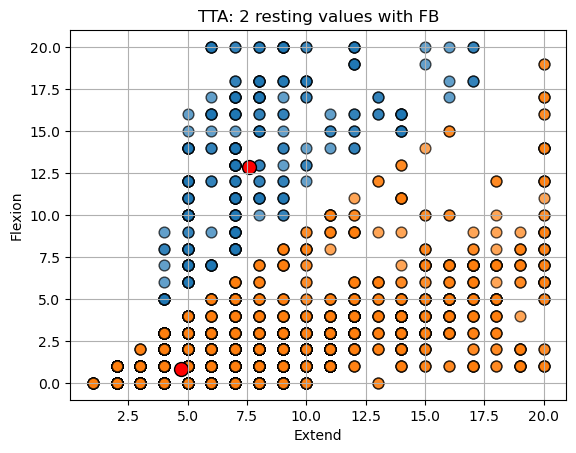

In [69]:
# find resting data. emg signal below 20
emg1_rest_feed, emg2_rest_feed = find_rest_data(emg1_norm_feed, emg2_norm_feed)


# normalised WITH FB
flex_x_feed, flex_y_feed = find_flex_data(emg1_rest_feed, emg2_rest_feed)
ex_x_feed, ex_y_feed = find_ex_data(emg1_rest_feed, emg2_rest_feed)

# calculate Average resting values for flexion and extension with FB
mean_flex_x_feed = mean(flex_x_feed)
mean_flex_y_feed = mean(flex_y_feed)
mean_ex_x_feed = mean(ex_x_feed)
mean_ex_y_feed = mean(ex_y_feed)
      

# WITH FB, create numpy arrays
sub2_flex_x_feed = np.array(flex_x_feed)
sub2_flex_y_feed = np.array(flex_y_feed)
sub2_ex_x_feed = np.array(ex_x_feed)
sub2_ex_y_feed = np.array(ex_y_feed)


plt.scatter(sub2_flex_x_feed, sub2_flex_y_feed,   s=60, alpha=0.7, edgecolors="k")
plt.scatter(sub2_ex_x_feed,   sub2_ex_y_feed,     s=60, alpha=0.7, edgecolors="k")

# plot mean values as one red point
plt.scatter(mean_flex_x_feed, mean_flex_y_feed, color="r", alpha=1, edgecolors="k", s=100)
plt.scatter(mean_ex_x_feed, mean_ex_y_feed, color="r", alpha=1, edgecolors="k", s=100)


print(f"mean values for flex x and y: {mean_flex_x_feed}, {mean_flex_y_feed}")
TTA2_mag_flex_feed = m.sqrt(mean_flex_x_feed**2 + mean_flex_y_feed**2)
print(f"Magnitude of flex: {TTA2_mag_flex_feed}")

print(f"mean values for ex x and y: {mean_ex_x_feed}, {mean_ex_y_feed}")
TTA2_mag_ex_feed = m.sqrt(mean_ex_x_feed**2 + mean_ex_y_feed**2)
print(f"Magnitude of flex: {TTA2_mag_ex_feed}")


# Create sequence of 100 numbers from 0 to max value
sub2_xseq_flex_feed = np.linspace(0, 34, num=100)
# plt.plot(sub2_xseq_flex_feed, sub2_a_feed*sub2_xseq_flex_feed+sub2_b_feed, color='y')

# Create sequence of 100 numbers from 0 to max value
sub2_xseq_ex_feed = np.linspace(0, max(sub2_ex_x_feed), num=100)
# plt.plot(sub2_xseq_ex_feed, sub2_c_feed*sub2_xseq_ex_feed+sub2_d_feed, color='y')

plt.title('TTA: 2 resting values with FB')
plt.xlabel("Extend")
plt.ylabel("Flexion")
plt.grid()
plt.show() 

Barplot of resting values

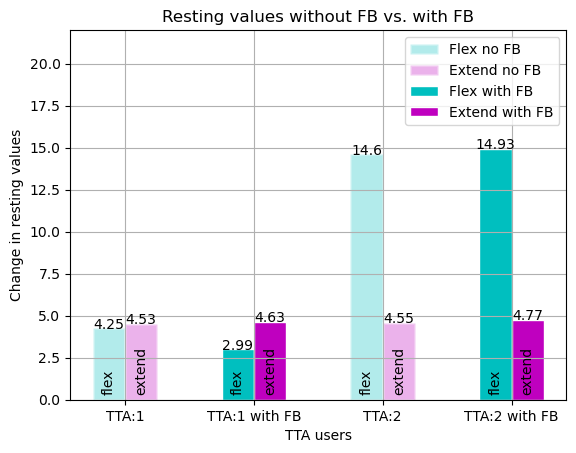

In [70]:
# red = decrease in co-contraction, green = increase in co-contraction
flex_1_2 = [round(TTA1_mag_flex,2), round(TTA2_mag_flex,2)]
ex_1_2 = [round(TTA1_mag_ex,2), round(TTA2_mag_ex,2)]
flex_1_2_feed = [round(TTA1_mag_flex_feed,2), round(TTA2_mag_flex_feed,2)]
ex_1_2_feed = [round(TTA1_mag_ex_feed,2), round(TTA2_mag_ex_feed,2)]


subject_list = ["TTA:1", "TTA:1 with FB", "TTA:2", "TTA:2 with FB"]


# function to add value labels
def addlabel_flex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "flex", ha = 'center', rotation = 90)

def addlabel_ex(r,list):
    for i in range(len(list)):
        plt.text(r[i], 0.5, "extend", ha = 'center', rotation = 90)

def addvalue(r,list):
    for i in range(len(list)):
        plt.text(r[i], list[i], list[i], ha = 'center')


width = 0.25

r = [1,2,3,4]
r_flex = [1,3]
r_ex = [x + width for x in r_flex]

r_flex_feed = [2,4]
r_ex_feed = [x + width for x in r_flex_feed]

r_middle = [x + 0.5*width for x in r]


plt.bar(r_flex, flex_1_2, color = "c", alpha = 0.3,  width = width, edgecolor = 'white', linewidth = 2, label="Flex no FB")
plt.bar(r_ex, ex_1_2, color = "m",     alpha = 0.3,   width = width, edgecolor = 'white', linewidth = 2, label = "Extend no FB")


plt.bar(r_flex_feed, flex_1_2_feed , color = "c",    width = width, edgecolor = 'white', label = "Flex with FB")
plt.bar(r_ex_feed, ex_1_2_feed ,     color = "m",    width = width, edgecolor = 'white', label = "Extend with FB")


addlabel_flex(r_flex, flex_1_2)
addlabel_flex(r_flex_feed, flex_1_2_feed)

addlabel_ex(r_ex, ex_1_2)
addlabel_ex(r_ex_feed, ex_1_2)

addvalue(r_flex, flex_1_2)
addvalue(r_flex_feed, flex_1_2_feed)
addvalue(r_ex, ex_1_2)
addvalue(r_ex_feed, ex_1_2_feed)

plt.xlabel("TTA users") 
plt.ylabel("Change in resting values")  
plt.xticks(r_middle ,subject_list) 


plt.ylim(0,22)
plt.legend(loc = "upper right")
plt.title("Resting values without FB vs. with FB")
plt.grid()
plt.show()